<center><img src="prog_lang.jpg" width=500></center>

How can you determine which programming languages and technologies are most widely used? Which languages are gaining or losing popularity, helping you decide where to focus your efforts?

One excellent data source is Stack Overflow, a programming question-and-answer site with more than 16 million questions on programming topics. Each Stack Overflow question is tagged with a label identifying its topic or technology. By counting the number of questions related to each technology, you can estimate the popularity of different programming languages.

In this project, you will use data from the Stack Exchange Data Explorer to examine the relative popularity of R compared to other programming languages.

You'll work with a dataset containing one observation per tag per year, including the number of questions for that tag and the total number of questions that year.

`stack_overflow_data.csv`
|Column|Description|
|------|-----------|
|`year`|The year the question was asked (2008-2020)|
|`tag`|A word or phrase that describes the topic of the question, such as the programming language|
|`num_questions`|The number of questions with a certain tag in that year|
|`year_total`|The total number of questions asked in that year|

In [36]:
# Load necessary packages
library(readr)
library(dplyr)
library(ggplot2)

In [37]:
# Load the dataset
data <- read_csv("stack_overflow_data.csv")

Rows: 420066 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tag
dbl (3): year, num_questions, year_total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [38]:
# View the dataset
head(data)

year,tag,num_questions,year_total
<dbl>,<chr>,<dbl>,<dbl>
2008,treeview,69,168541
2008,scheduled-tasks,30,168541
2008,specifications,21,168541
2008,rendering,35,168541
2008,http-post,6,168541
2008,static-assert,1,168541


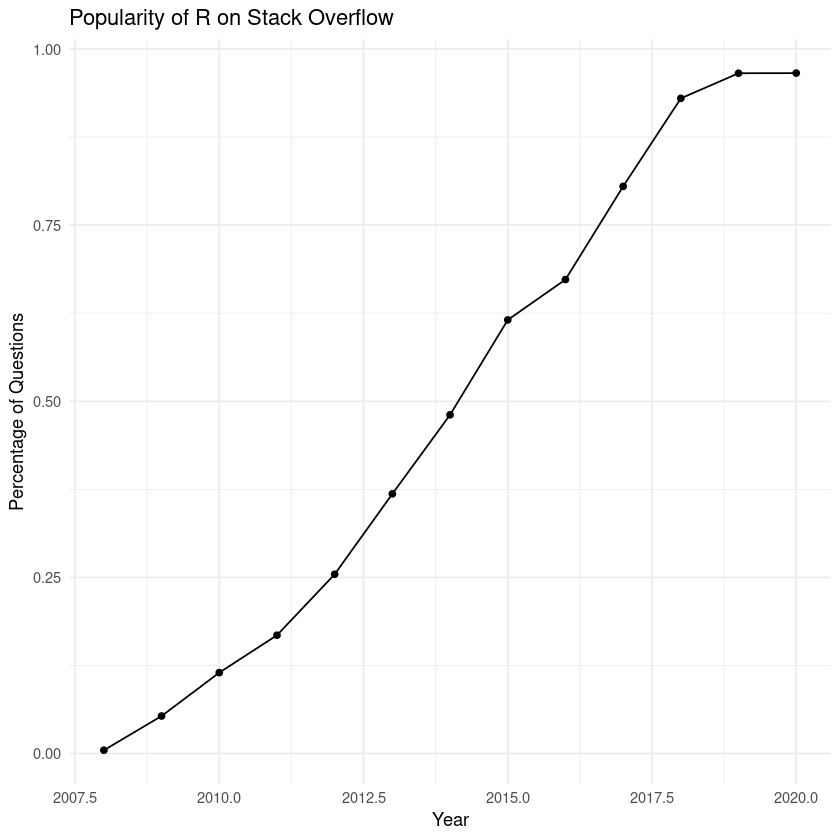

In [39]:
# Calculate the percentage of questions for each tag per year
data <- data %>%
  mutate(percentage = (num_questions / year_total) * 100)

# Filter the data for the tag "r"
r_data <- data %>%
  filter(tag == "r")

# Save the data for the year 2020 to the variable 'r_2020'
r_2020 <- r_data %>%
  filter(year == 2020)

# Find the tags with the highest percentage of questions in 2020
highest_tags <- data %>%
  filter(year == 2020) %>%
  arrange(desc(percentage)) %>%
  head(5)

# Plot the percentage of questions tagged with "r" over the years
ggplot(r_data, aes(x = year, y = percentage)) +
  geom_line() +
  geom_point() +
  labs(title = "Popularity of R on Stack Overflow",
       x = "Year",
       y = "Percentage of Questions") +
  theme_minimal()